In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [364]:
data = pd.read_csv('kidney_disease.csv')
data.head()

id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]

In [365]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [366]:
data.drop('id', axis=1, inplace=True)

In [367]:
data.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [368]:
data['packed_cell_volume'] = pd.to_numeric(data['packed_cell_volume'], errors='coerce')
data['white_blood_cell_count'] = pd.to_numeric(data['white_blood_cell_count'], errors='coerce')
data['red_blood_cell_count'] = pd.to_numeric(data['red_blood_cell_count'], errors='coerce')

In [369]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [370]:
cat_cols = [col for col in data.columns if data[col].dtype == 'object']
num_cols = [col for col in data.columns if data[col].dtype != 'object']

In [371]:
for col in cat_cols:
    print(f'{col} has {data[col].unique()}')

red_blood_cells has [nan 'normal' 'abnormal']
pus_cell has ['normal' 'abnormal' nan]
pus_cell_clumps has ['notpresent' 'present' nan]
bacteria has ['notpresent' 'present' nan]
hypertension has ['yes' 'no' nan]
diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan]
coronary_artery_disease has ['no' 'yes' '\tno' nan]
appetite has ['good' 'poor' nan]
peda_edema has ['no' 'yes' nan]
aanemia has ['no' 'yes' nan]
class has ['ckd' 'ckd\t' 'notckd']


In [372]:
data['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

data['coronary_artery_disease'] = data['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

data['class'] = data['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [373]:
data['class'] = data['class'].map({'ckd': 0, 'not ckd': 1})
data['class'] = pd.to_numeric(data['class'], errors='coerce')

In [374]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {data[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

class has [0 1] values



In [375]:
data[num_cols].isnull().sum()

age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [376]:
def random_value_imputation(feature):
    random_sample = data[feature].dropna().sample(data[feature].isna().sum())
    random_sample.index = data[data[feature].isnull()].index
    data.loc[data[feature].isnull(), feature] = random_sample

for col in num_cols:
    random_value_imputation(col)

data[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [377]:
def impute_mode(feature):
    mode = data[feature].mode()[0]
    data[feature] = data[feature].fillna(mode)

for col in cat_cols:
    impute_mode(col)

data[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [378]:
data.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [379]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    data[col] = le.fit_transform(data[col])



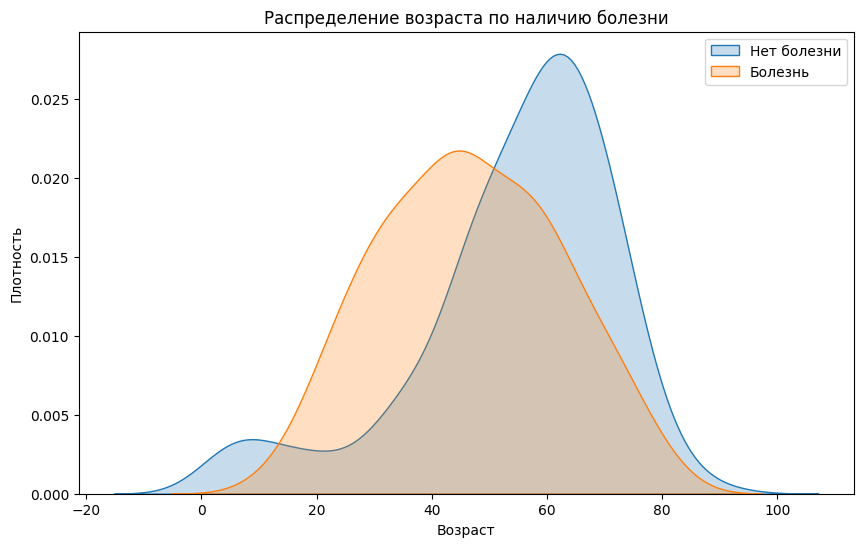

In [380]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=data[data['class'] == 0]['age'], label='Нет болезни', fill=True)
sns.kdeplot(data=data[data['class'] == 1]['age'], label='Болезнь', fill=True)
plt.title('Распределение возраста по наличию болезни')
plt.xlabel('Возраст')
plt.ylabel('Плотность')
plt.legend()
plt.show()

### Из графика ясно, что люди помладше в среднем болеют чаще

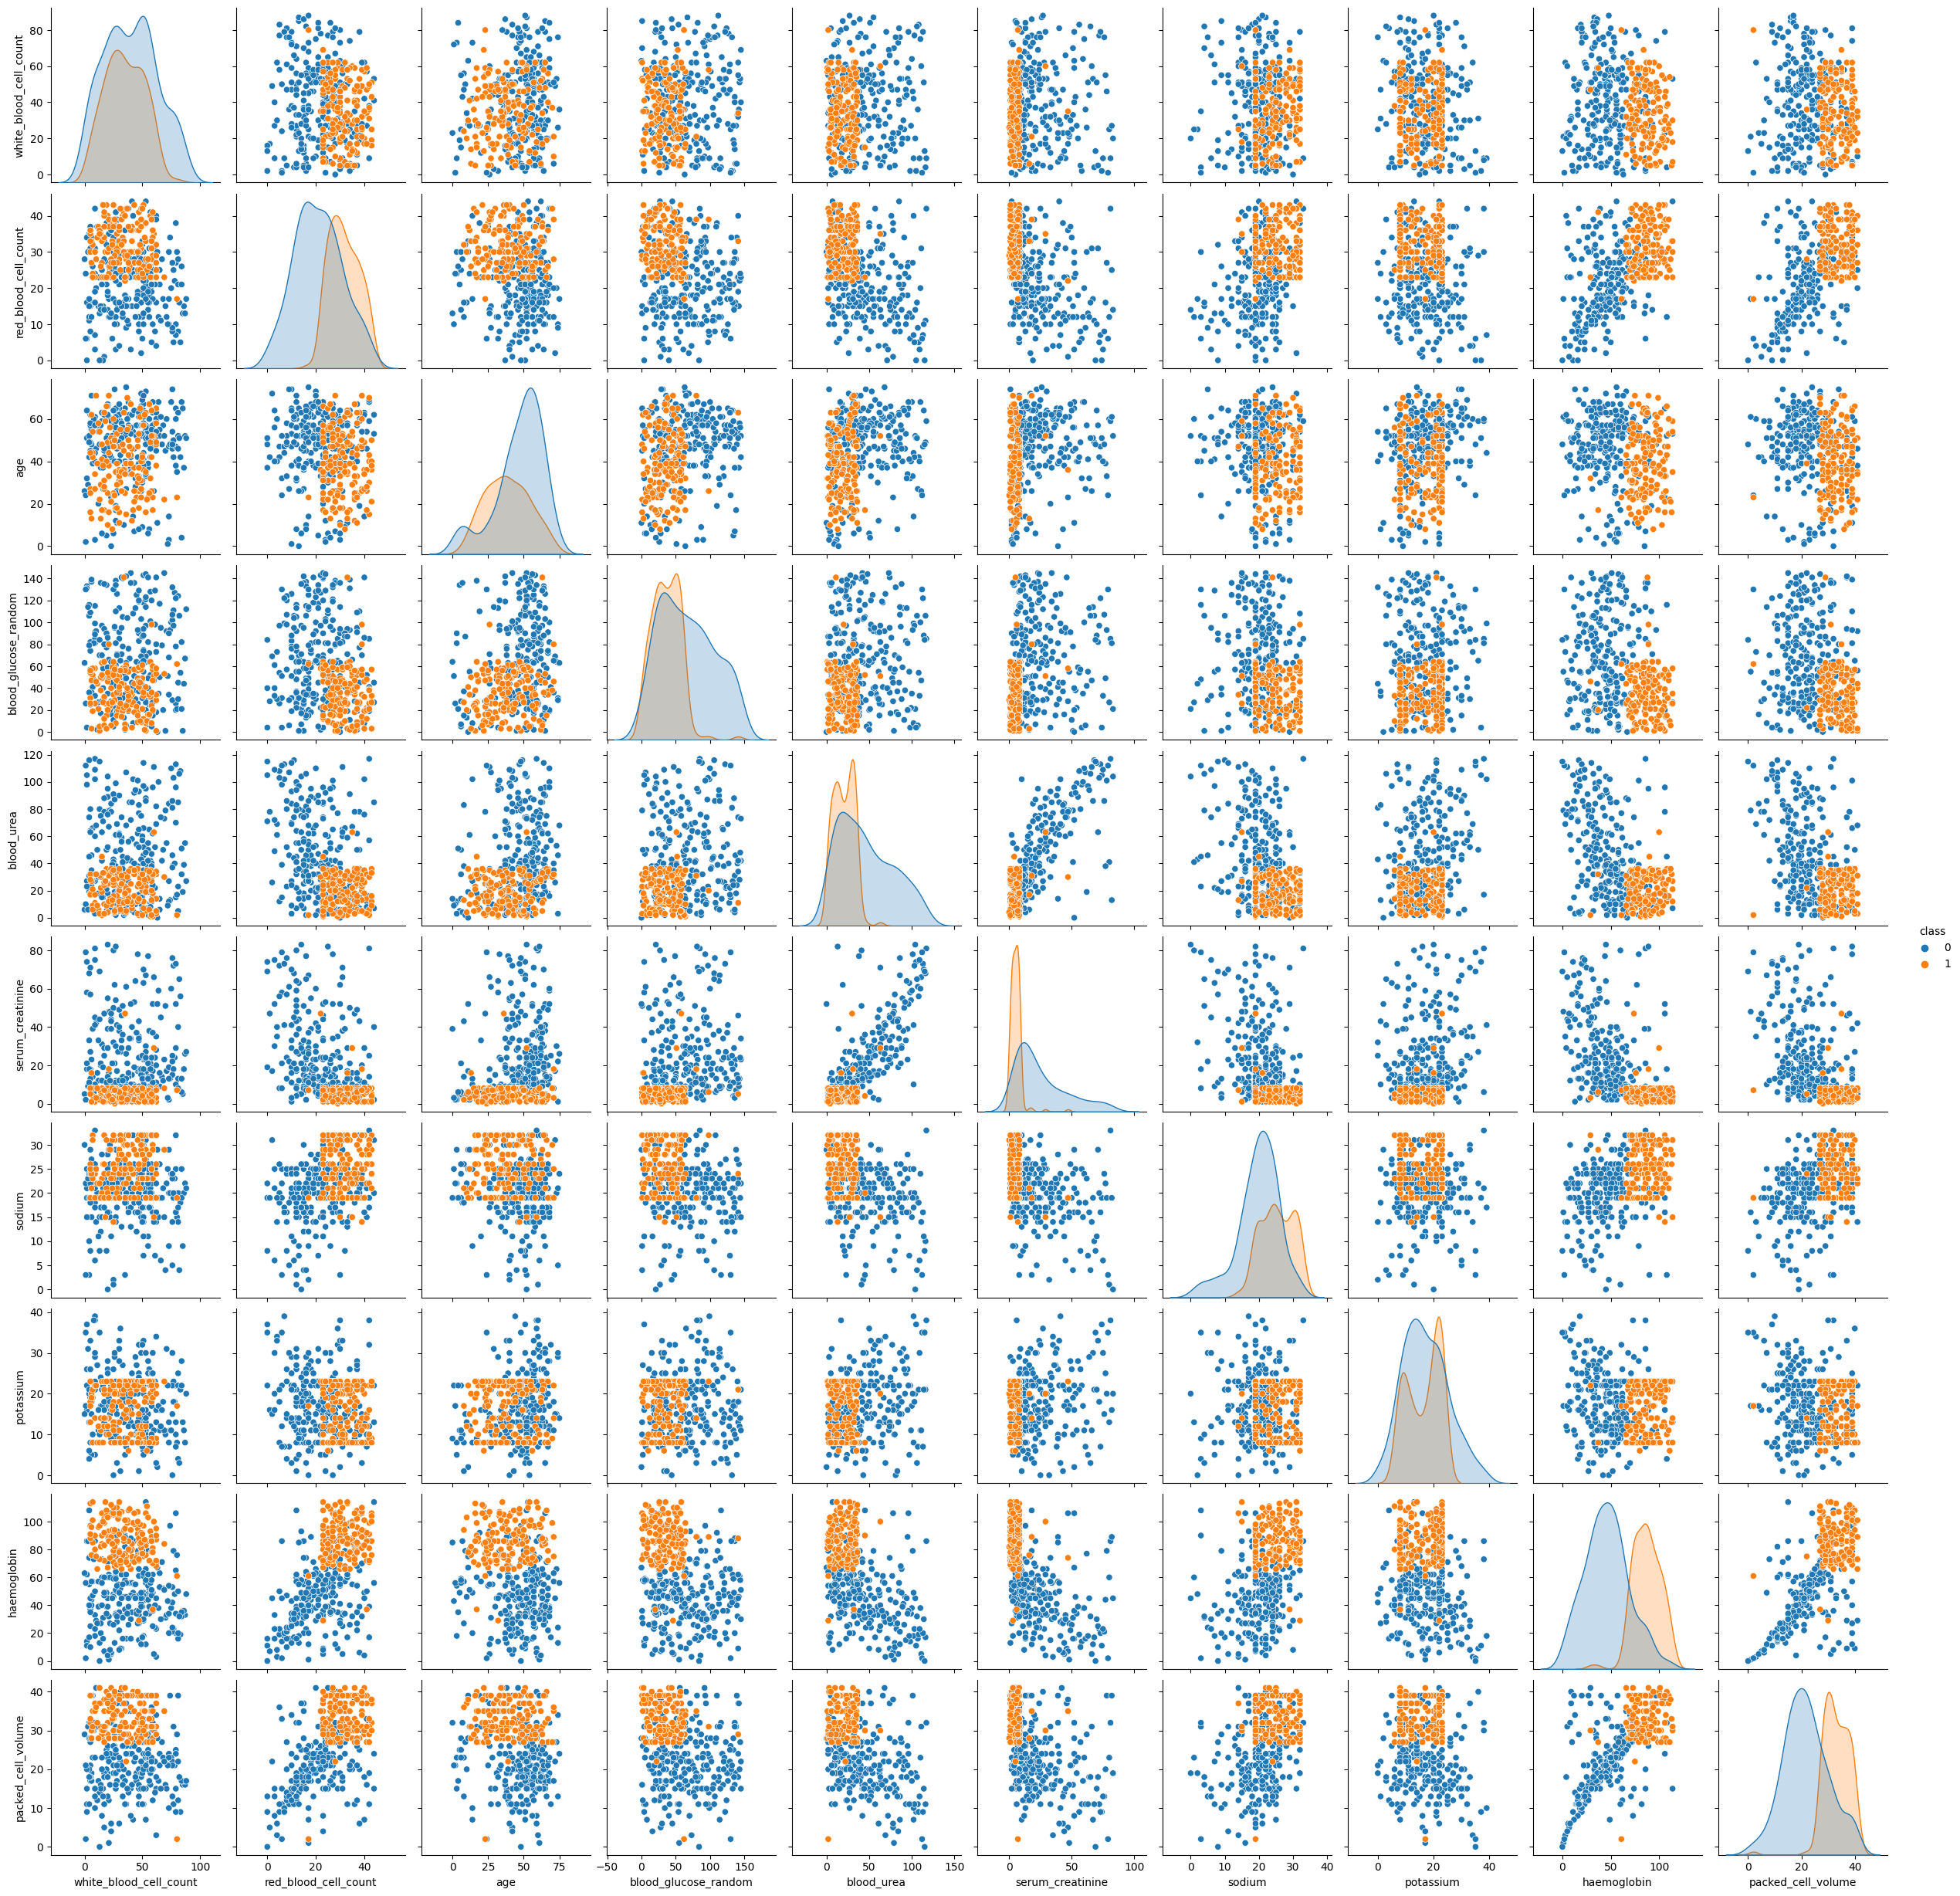

In [232]:
cols = ['white_blood_cell_count', 'red_blood_cell_count', 'age', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'class']
sns.pairplot(data[cols], hue="class")
plt.show()

In [340]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data_scaled = data.copy()
for column in data.columns:
    data_scaled[column] = scaler.fit_transform(data[[column]])

data = pd.DataFrame(data_scaled, columns=data.columns)
data.head()

age  blood_pressure  specific_gravity  albumin  sugar  \
0  0.533333        0.333333              0.75      0.2    0.0   
1  0.066667        0.000000              0.75      0.8    0.0   
2  0.720000        0.333333              0.25      0.4    0.6   
3  0.533333        0.222222              0.00      0.8    0.0   
4  0.573333        0.333333              0.25      0.4    0.0   

   red_blood_cells  pus_cell  pus_cell_clumps  bacteria  blood_glucose_random  \
0              1.0       1.0              0.0       0.0              0.331034   
1              1.0       1.0              0.0       0.0              0.531034   
2              1.0       1.0              0.0       0.0              0.965517   
3              1.0       0.0              1.0       0.0              0.303448   
4              1.0       1.0              0.0       0.0              0.227586   

   ...  packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
0  ...            0.756098                0.397727              0.681818   
1  ...            0.609756                0.215909              0.386364   
2  ...            0.439024                0.375000              0.909091   
3  ...            0.463415                0.284091              0.386364   
4  ...            0.536585                0.352273              0.545455   

   hypertension  diabetes_mellitus  coronary_artery_disease  appetite  \
0           1.0                1.0                      0.0       0.0   
1           0.0                0.0                      0.0       0.0   
2           0.0                1.0                      0.0       1.0   
3           1.0                0.0                      0.0       1.0   
4           0.0                0.0                      0.0       0.0   

   peda_edema  aanemia  class  
0         0.0      0.0    0.0  
1         0.0      0.0    0.0  
2         0.0      1.0    0.0  
3         1.0      1.0    0.0  
4         0.0      0.0    0.0  

[5 rows x 25 columns]

<Axes: >

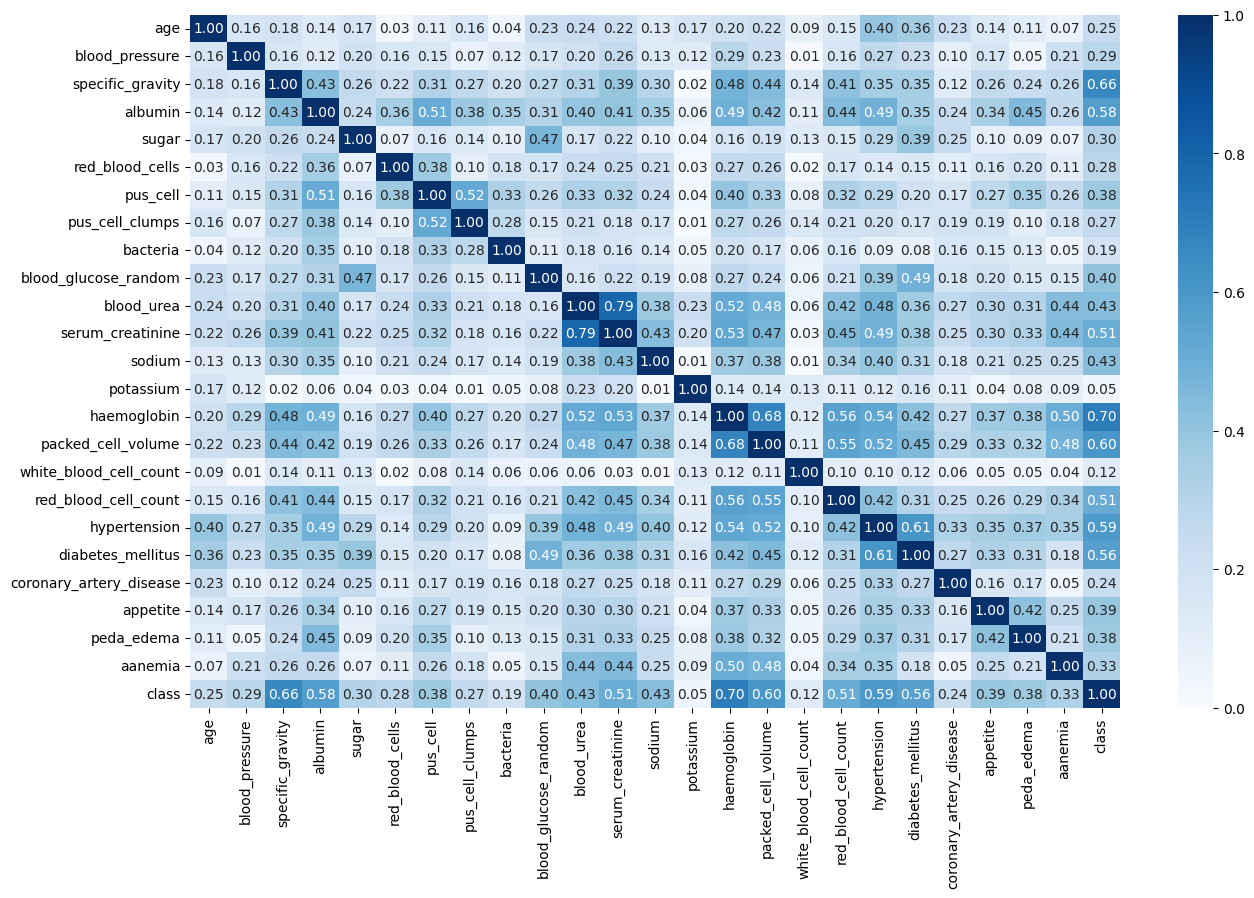

In [234]:
corr = data.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(abs(corr), cmap='Blues', vmin=0, vmax=1, annot=True, fmt='.2f')

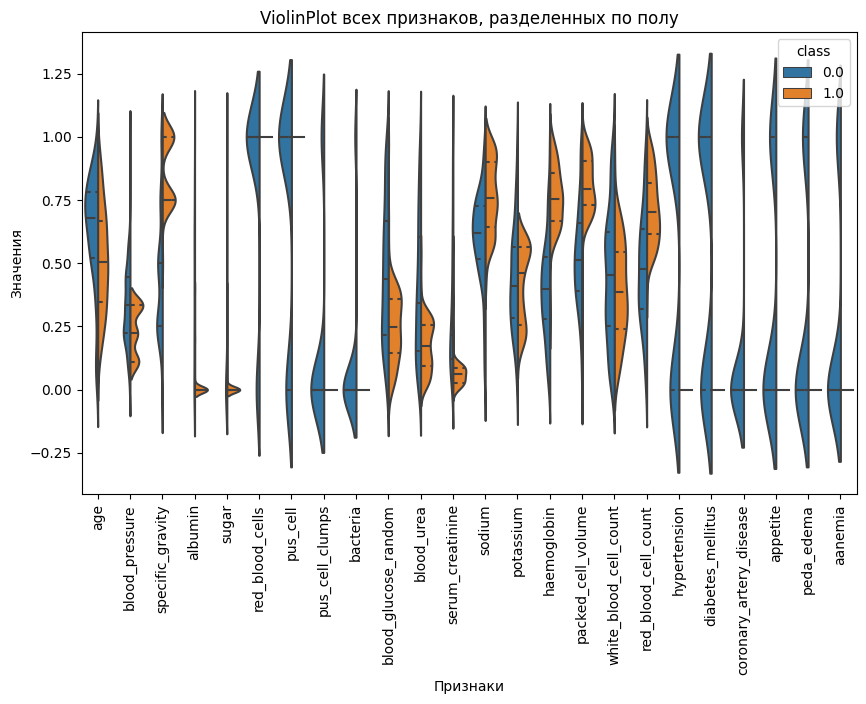

In [235]:
df_melted = data.melt(id_vars='class')

plt.figure(figsize=(10, 6))
sns.violinplot(x='variable', y='value', hue='class', data=df_melted, split=True, inner="quart")
plt.xticks(rotation=90)
plt.title("ViolinPlot всех признаков, разделенных по полу")
plt.xlabel("Признаки")
plt.ylabel("Значения")
plt.show()

In [236]:
ind_col = [col for col in data.columns if col != 'class']
dep_col = 'class'

In [237]:
X = data[ind_col]
y = data[dep_col]

# PCA classification

In [238]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
datax_pca = pca.fit(X)
datax_pca.explained_variance_ratio_
n_components = sum(datax_pca.explained_variance_ratio_ > 0.1)
pca = PCA(n_components=n_components)
data_PCA = pca.fit_transform(X)
print(n_components)

1


In [239]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_PCA, y, test_size = 0.3, random_state = 42)

In [240]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)


knn_acc = accuracy_score(y_test, knn.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")

Training Accuracy of KNN is 0.9678571428571429
Test Accuracy of KNN is 0.9916666666666667 

Confusion Matrix :- 
[[75  1]
 [ 0 44]]

Classification Report :- 
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99        76
         1.0       0.98      1.00      0.99        44

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [241]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.9583333333333334 

Confusion Matrix :- 
[[74  2]
 [ 3 41]]

Classification Report :- 
               precision    recall  f1-score   support

         0.0       0.96      0.97      0.97        76
         1.0       0.95      0.93      0.94        44

    accuracy                           0.96       120
   macro avg       0.96      0.95      0.95       120
weighted avg       0.96      0.96      0.96       120



In [ ]:
from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

In [243]:
print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
0.975


In [244]:
dtc = grid_search_dtc.best_estimator_

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.9714285714285714
Test Accuracy of Decision Tree Classifier is 0.9916666666666667 

Confusion Matrix :- 
[[75  1]
 [ 0 44]]

Classification Report :- 
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99        76
         1.0       0.98      1.00      0.99        44

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [245]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rd_clf.fit(X_train, y_train)

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")

Training Accuracy of Random Forest Classifier is 0.9821428571428571
Test Accuracy of Random Forest Classifier is 0.9666666666666667 

Confusion Matrix :- 
[[74  2]
 [ 2 42]]

Classification Report :- 
               precision    recall  f1-score   support

         0.0       0.97      0.97      0.97        76
         1.0       0.95      0.95      0.95        44

    accuracy                           0.97       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.97      0.97      0.97       120



In [246]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(estimator = dtc)
ada.fit(X_train, y_train)

ada_acc = accuracy_score(y_test, ada.predict(X_test))

print(f"Training Accuracy of Ada Boost Classifier is {accuracy_score(y_train, ada.predict(X_train))}")
print(f"Test Accuracy of Ada Boost Classifier is {ada_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, ada.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, ada.predict(X_test))}")

Training Accuracy of Ada Boost Classifier is 0.9892857142857143
Test Accuracy of Ada Boost Classifier is 0.975 

Confusion Matrix :- 
[[74  2]
 [ 1 43]]

Classification Report :- 
               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98        76
         1.0       0.96      0.98      0.97        44

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120



In [247]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")

Training Accuracy of Gradient Boosting Classifier is 1.0
Test Accuracy of Gradient Boosting Classifier is 0.9583333333333334 

Confusion Matrix :- 
[[74  2]
 [ 3 41]]

Classification Report :- 
               precision    recall  f1-score   support

         0.0       0.96      0.97      0.97        76
         1.0       0.95      0.93      0.94        44

    accuracy                           0.96       120
   macro avg       0.96      0.95      0.95       120
weighted avg       0.96      0.96      0.96       120



In [248]:
sgb = GradientBoostingClassifier(max_depth = 4, subsample = 0.90, max_features = 0.75, n_estimators = 200)
sgb.fit(X_train, y_train)

sgb_acc = accuracy_score(y_test, sgb.predict(X_test))

print(f"Training Accuracy of Stochastic Gradient Boosting is {accuracy_score(y_train, sgb.predict(X_train))}")
print(f"Test Accuracy of Stochastic Gradient Boosting is {sgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, sgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, sgb.predict(X_test))}")

Training Accuracy of Stochastic Gradient Boosting is 1.0
Test Accuracy of Stochastic Gradient Boosting is 0.9583333333333334 

Confusion Matrix :- 
[[74  2]
 [ 3 41]]

Classification Report :- 
               precision    recall  f1-score   support

         0.0       0.96      0.97      0.97        76
         1.0       0.95      0.93      0.94        44

    accuracy                           0.96       120
   macro avg       0.96      0.95      0.95       120
weighted avg       0.96      0.96      0.96       120



In [249]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 150)
xgb.fit(X_train, y_train)

xgb_acc = accuracy_score(y_test, xgb.predict(X_test))

print(f"Training Accuracy of XgBoost is {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Test Accuracy of XgBoost is {xgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, xgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, xgb.predict(X_test))}")

Training Accuracy of XgBoost is 0.9928571428571429
Test Accuracy of XgBoost is 0.9583333333333334 

Confusion Matrix :- 
[[74  2]
 [ 3 41]]

Classification Report :- 
               precision    recall  f1-score   support

         0.0       0.96      0.97      0.97        76
         1.0       0.95      0.93      0.94        44

    accuracy                           0.96       120
   macro avg       0.96      0.95      0.95       120
weighted avg       0.96      0.96      0.96       120



In [250]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(iterations=10)
cat.fit(X_train, y_train)

Learning rate set to 0.408198
0:	learn: 0.4440374	total: 7.87ms	remaining: 70.8ms
1:	learn: 0.3135590	total: 8.76ms	remaining: 35ms
2:	learn: 0.2389240	total: 9.44ms	remaining: 22ms
3:	learn: 0.1914883	total: 10.1ms	remaining: 15.1ms
4:	learn: 0.1592124	total: 10.7ms	remaining: 10.7ms
5:	learn: 0.1374207	total: 11.4ms	remaining: 7.59ms
6:	learn: 0.1197885	total: 12.1ms	remaining: 5.17ms
7:	learn: 0.1097622	total: 12.7ms	remaining: 3.18ms
8:	learn: 0.1007693	total: 13.4ms	remaining: 1.49ms
9:	learn: 0.0941554	total: 14.1ms	remaining: 0us


In [251]:
cat_acc = accuracy_score(y_test, cat.predict(X_test))

print(f"Training Accuracy of Cat Boost Classifier is {accuracy_score(y_train, cat.predict(X_train))}")
print(f"Test Accuracy of Cat Boost Classifier is {cat_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, cat.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, cat.predict(X_test))}")

Training Accuracy of Cat Boost Classifier is 0.9714285714285714
Test Accuracy of Cat Boost Classifier is 0.9916666666666667 

Confusion Matrix :- 
[[75  1]
 [ 0 44]]

Classification Report :- 
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99        76
         1.0       0.98      1.00      0.99        44

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [252]:
models = pd.DataFrame({
    'Model' : [ 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'Stochastic Gradient Boosting', 'XgBoost', 'Cat Boost'],
    'Score' : [knn_acc, dtc_acc, rd_clf_acc, ada_acc, gb_acc, sgb_acc, xgb_acc, cat_acc]
})


models.sort_values(by = 'Score', ascending = False)

Model     Score
0                           KNN  0.991667
1      Decision Tree Classifier  0.991667
7                     Cat Boost  0.991667
3          Ada Boost Classifier  0.975000
2      Random Forest Classifier  0.966667
4  Gradient Boosting Classifier  0.958333
5  Stochastic Gradient Boosting  0.958333
6                       XgBoost  0.958333

# LDA classification

In [253]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_lda = lda.fit_transform(X, y)

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size = 0.3, random_state = 42)

In [255]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)


knn_acc = accuracy_score(y_test, knn.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")

Training Accuracy of KNN is 0.9857142857142858
Test Accuracy of KNN is 0.9833333333333333 

Confusion Matrix :- 
[[75  1]
 [ 1 43]]

Classification Report :- 
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99        76
         1.0       0.98      0.98      0.98        44

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [256]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.975 

Confusion Matrix :- 
[[75  1]
 [ 2 42]]

Classification Report :- 
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98        76
         1.0       0.98      0.95      0.97        44

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [ ]:
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

In [258]:
print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 7, 'splitter': 'random'}
0.9857142857142858


In [259]:
dtc = grid_search_dtc.best_estimator_

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.975
Test Accuracy of Decision Tree Classifier is 0.9833333333333333 

Confusion Matrix :- 
[[74  2]
 [ 0 44]]

Classification Report :- 
               precision    recall  f1-score   support

         0.0       1.00      0.97      0.99        76
         1.0       0.96      1.00      0.98        44

    accuracy                           0.98       120
   macro avg       0.98      0.99      0.98       120
weighted avg       0.98      0.98      0.98       120



In [260]:
rd_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rd_clf.fit(X_train, y_train)


rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")

Training Accuracy of Random Forest Classifier is 0.9892857142857143
Test Accuracy of Random Forest Classifier is 0.9833333333333333 

Confusion Matrix :- 
[[75  1]
 [ 1 43]]

Classification Report :- 
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99        76
         1.0       0.98      0.98      0.98        44

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [261]:
ada = AdaBoostClassifier(estimator = dtc)
ada.fit(X_train, y_train)

ada_acc = accuracy_score(y_test, ada.predict(X_test))

print(f"Training Accuracy of Ada Boost Classifier is {accuracy_score(y_train, ada.predict(X_train))}")
print(f"Test Accuracy of Ada Boost Classifier is {ada_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, ada.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, ada.predict(X_test))}")

Training Accuracy of Ada Boost Classifier is 0.9964285714285714
Test Accuracy of Ada Boost Classifier is 0.975 

Confusion Matrix :- 
[[75  1]
 [ 2 42]]

Classification Report :- 
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98        76
         1.0       0.98      0.95      0.97        44

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [262]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")

Training Accuracy of Gradient Boosting Classifier is 1.0
Test Accuracy of Gradient Boosting Classifier is 0.975 

Confusion Matrix :- 
[[75  1]
 [ 2 42]]

Classification Report :- 
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98        76
         1.0       0.98      0.95      0.97        44

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [263]:
sgb = GradientBoostingClassifier(max_depth = 4, subsample = 0.90, max_features = 0.75, n_estimators = 200)
sgb.fit(X_train, y_train)

sgb_acc = accuracy_score(y_test, sgb.predict(X_test))

print(f"Training Accuracy of Stochastic Gradient Boosting is {accuracy_score(y_train, sgb.predict(X_train))}")
print(f"Test Accuracy of Stochastic Gradient Boosting is {sgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, sgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, sgb.predict(X_test))}")

Training Accuracy of Stochastic Gradient Boosting is 1.0
Test Accuracy of Stochastic Gradient Boosting is 0.975 

Confusion Matrix :- 
[[75  1]
 [ 2 42]]

Classification Report :- 
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98        76
         1.0       0.98      0.95      0.97        44

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [264]:
xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 150)
xgb.fit(X_train, y_train)

xgb_acc = accuracy_score(y_test, xgb.predict(X_test))

print(f"Training Accuracy of XgBoost is {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Test Accuracy of XgBoost is {xgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, xgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, xgb.predict(X_test))}")

Training Accuracy of XgBoost is 0.9928571428571429
Test Accuracy of XgBoost is 0.9833333333333333 

Confusion Matrix :- 
[[75  1]
 [ 1 43]]

Classification Report :- 
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99        76
         1.0       0.98      0.98      0.98        44

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [265]:
cat = CatBoostClassifier(iterations=10)
cat.fit(X_train, y_train)

Learning rate set to 0.408198
0:	learn: 0.4340250	total: 969us	remaining: 8.72ms
1:	learn: 0.3113381	total: 1.88ms	remaining: 7.53ms
2:	learn: 0.2351226	total: 2.75ms	remaining: 6.43ms
3:	learn: 0.1824823	total: 3.59ms	remaining: 5.38ms
4:	learn: 0.1492555	total: 4.47ms	remaining: 4.47ms
5:	learn: 0.1244727	total: 5.29ms	remaining: 3.53ms
6:	learn: 0.1051147	total: 6.12ms	remaining: 2.62ms
7:	learn: 0.0921759	total: 7ms	remaining: 1.75ms
8:	learn: 0.0863256	total: 7.82ms	remaining: 869us
9:	learn: 0.0797808	total: 8.63ms	remaining: 0us


In [266]:
cat_acc = accuracy_score(y_test, cat.predict(X_test))

print(f"Training Accuracy of Cat Boost Classifier is {accuracy_score(y_train, cat.predict(X_train))}")
print(f"Test Accuracy of Cat Boost Classifier is {cat_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, cat.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, cat.predict(X_test))}")

Training Accuracy of Cat Boost Classifier is 0.9821428571428571
Test Accuracy of Cat Boost Classifier is 0.975 

Confusion Matrix :- 
[[74  2]
 [ 1 43]]

Classification Report :- 
               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98        76
         1.0       0.96      0.98      0.97        44

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120



In [267]:
models = pd.DataFrame({
    'Model' : [ 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'Stochastic Gradient Boosting', 'XgBoost', 'Cat Boost'],
    'Score' : [knn_acc, dtc_acc, rd_clf_acc, ada_acc, gb_acc, sgb_acc, xgb_acc, cat_acc]
})


models.sort_values(by = 'Score', ascending = False)

Model     Score
0                           KNN  0.983333
1      Decision Tree Classifier  0.983333
2      Random Forest Classifier  0.983333
6                       XgBoost  0.983333
3          Ada Boost Classifier  0.975000
4  Gradient Boosting Classifier  0.975000
5  Stochastic Gradient Boosting  0.975000
7                     Cat Boost  0.975000

# В результате классификации, в целом, метод понижения размерности LDA справился лучше. Вероятно это потому, что LDA - метод понижения размерности с учителем (для обучения нужно было значение y). LDA стремится найти линейные зависимости, чтобы максимизировать разнообразие между различными категориями, минимизируя при этом разнообразие внутри класса.

# Регрессия (предсказание гемоглобина)
## PCA

In [305]:
X = data[['hypertension','aanemia','red_blood_cell_count','blood_urea','albumin','specific_gravity','packed_cell_volume', 'serum_creatinine']]
y = data['haemoglobin']

In [299]:
X.head()

hypertension  aanemia  red_blood_cell_count  blood_urea  albumin  \
0           1.0      0.0              0.681818    0.196581      0.2   
1           0.0      0.0              0.477273    0.042735      0.8   
2           0.0      1.0              0.522727    0.341880      0.4   
3           1.0      1.0              0.386364    0.367521      0.8   
4           0.0      0.0              0.545455    0.111111      0.4   

   specific_gravity  packed_cell_volume  serum_creatinine  
0              0.75            0.756098          0.096386  
1              0.75            0.609756          0.048193  
2              0.25            0.439024          0.168675  
3              0.00            0.463415          0.385542  
4              0.25            0.536585          0.120482

In [271]:
pca = PCA(n_components=None)
datax_pca = pca.fit(X)
datax_pca.explained_variance_ratio_
n_components = sum(datax_pca.explained_variance_ratio_ > 0.1)
pca = PCA(n_components=n_components)
data_PCA = pca.fit_transform(X)
print(n_components)

3


In [272]:
X_train, X_test, y_train, y_test = train_test_split(data_PCA, y, train_size=0.2, random_state=42)

In [291]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_all = model_lr.predict(data_PCA)

y_pred_lr = model_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f'MSE: {mean_squared_error(y_test, y_pred_lr)}')
print(f'r2: {r2_score(y_test, y_pred_lr)}')

MSE: 0.029566498845342598
r2: 0.5225620757800254


In [292]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)

y_pred_r = ridge.predict(X_test)
y_pred_all = ridge.predict(data_PCA)
mse_r = mean_squared_error(y_test, y_pred_r)
print(f'MSE: {mean_squared_error(y_test, y_pred_r)}')
print(f'r2: {r2_score(y_test, y_pred_r)}')

MSE: 0.029268908378173475
r2: 0.5273675475288476


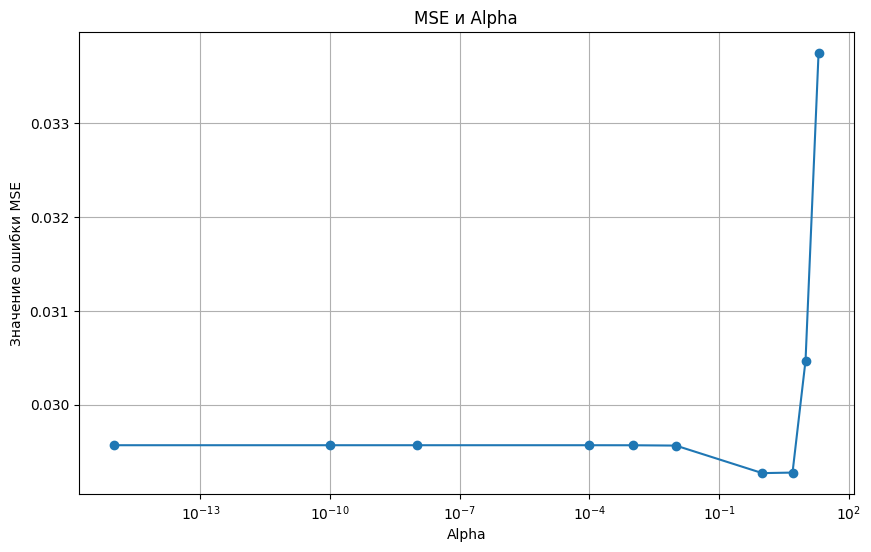

In [283]:
alphas = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]
mse_list = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)


plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_list, marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Значение ошибки MSE')
plt.title('MSE и Alpha')
plt.grid(True)
plt.show()

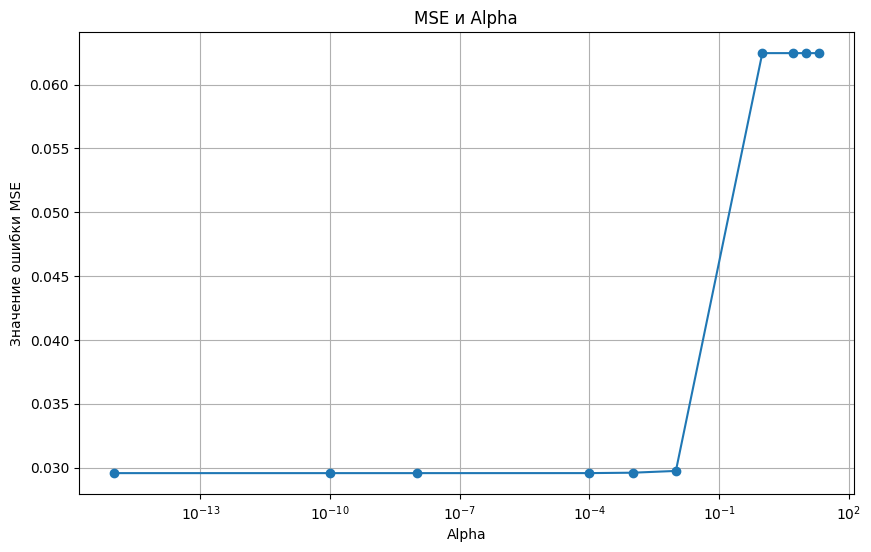

In [284]:
alphas = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]
mse_list = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)


plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_list, marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Значение ошибки MSE')
plt.title('MSE и Alpha')
plt.grid(True)
plt.show()

In [293]:
lasso = Lasso(alpha=1e-2)
lasso.fit(X_train, y_train)

y_pred_l = lasso.predict(X_test)
mse_l = mean_squared_error(y_test, y_pred_l)
print(f'MSE: {mean_squared_error(y_test, y_pred_l)}')
print(f'r2: {r2_score(y_test, y_pred_l)}')

MSE: 0.02973802740286104
r2: 0.5197922436509517


In [289]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


tree_model = DecisionTreeRegressor(max_depth=5)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
print(f"Decision Tree Regressor MSE: {mse_tree}")
print(f'DTR r2: {r2_score(y_test, y_pred_tree)}')

forest_model = RandomForestRegressor(max_depth=5, n_estimators=50)
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)
mse_forest = mean_squared_error(y_test, y_pred_forest)
print(f"Random Forest Regressor MSE: {mse_forest}")
print(f'RFR r2: {r2_score(y_test, y_pred_forest)}')

Decision Tree Regressor MSE: 0.04326905953931785
DTR r2: 0.30129400584551924
Random Forest Regressor MSE: 0.031334233878651925
RFR r2: 0.4940168040084548


In [288]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


parameters_tree = {'max_depth': [None, 5, 10, 15, 20]}
parameters_forest = {'n_estimators': [10, 50, 100, 200], 'max_depth': [None, 5, 10, 15, 20]}

tree_regressor = GridSearchCV(DecisionTreeRegressor(random_state=0), parameters_tree, scoring='neg_mean_squared_error', cv=5)
forest_regressor = GridSearchCV(RandomForestRegressor(random_state=0), parameters_forest, scoring='neg_mean_squared_error', cv=5)

tree_regressor.fit(X_train, y_train)
forest_regressor.fit(X_train, y_train)

print(f"Decision Tree Regressor Best parameters: {tree_regressor.best_params_}")
print(f"Decision Tree Regressor Best score: {tree_regressor.best_score_}")
print(f"Random Forest Regressor Best parameters: {forest_regressor.best_params_}")
print(f"Random Forest Regressor Best score: {forest_regressor.best_score_}")

Decision Tree Regressor Best parameters: {'max_depth': 5}
Decision Tree Regressor Best score: -0.036928869007384985
Random Forest Regressor Best parameters: {'max_depth': 5, 'n_estimators': 50}
Random Forest Regressor Best score: -0.02504997426781034


In [290]:
from sklearn.ensemble import GradientBoostingRegressor

reg1 = GradientBoostingRegressor(random_state=10)
reg1.fit(X_train, y_train)

y_pred_gbr = reg1.predict(X_test)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
print(f"GradientBoostingRegressor MSE: {mse_gbr}")
print('R2 score: {:.2f}'.format(r2_score(y_test, y_pred_gbr)))

GradientBoostingRegressor MSE: 0.03394888605193332
R2 score: 0.45


In [295]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Ridge','Lasso', 'Decision Tree', 'Random Forest',
             'Gradient Boosting'],
    'MSE' : [mse_lr, mse_r, mse_l, mse_tree, mse_forest, mse_gbr]
})


models.sort_values(by = 'MSE', ascending = True)

Model       MSE
1              Ridge  0.029269
0  Linear Regression  0.029566
2              Lasso  0.029738
4      Random Forest  0.031334
5  Gradient Boosting  0.033949
3      Decision Tree  0.043269

## LDA Regression
### Так как LDA не используется для регрессии, приходится разбить данные на части, чтобы получилось что-то вроде регрессии через классификацию

In [310]:
from sklearn.preprocessing import KBinsDiscretizer


kbins = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
y_binned = kbins.fit_transform(y.values.reshape(-1,1))

lda = LDA(n_components=1)
X_lda = lda.fit_transform(X, y_binned.ravel())

X_train, X_test, y_train, y_test = train_test_split(X_lda, y, train_size=0.2, random_state=42)

In [312]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_all = model_lr.predict(X_lda)

y_pred_lr = model_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f'MSE: {mean_squared_error(y_test, y_pred_lr)}')
print(f'r2: {r2_score(y_test, y_pred_lr)}')

MSE: 0.027606418367954084
r2: 0.5542133294277289


MSE: 0.027471271230741622
r2: 0.5563956767185767


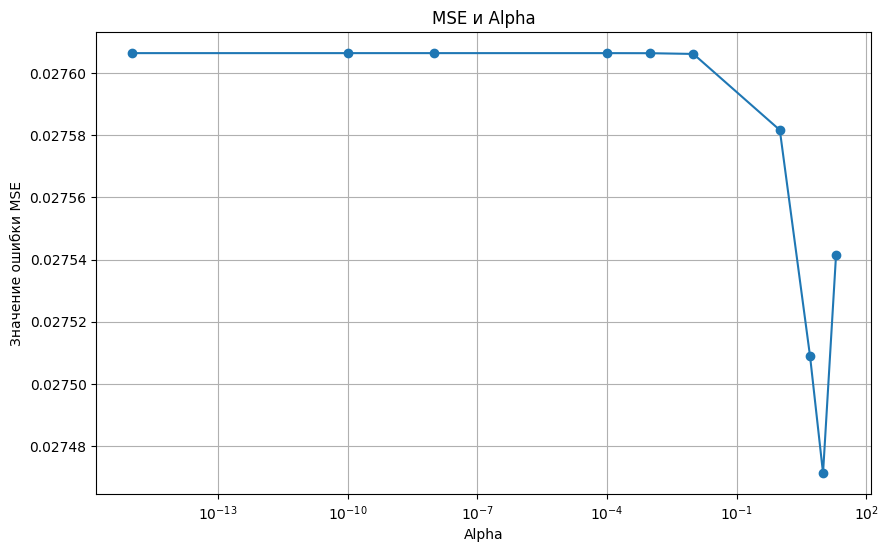

In [315]:
ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)

y_pred_r = ridge.predict(X_test)
y_pred_all = ridge.predict(X_lda)
mse_r = mean_squared_error(y_test, y_pred_r)
print(f'MSE: {mean_squared_error(y_test, y_pred_r)}')
print(f'r2: {r2_score(y_test, y_pred_r)}')

alphas = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]
mse_list = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)


plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_list, marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Значение ошибки MSE')
plt.title('MSE и Alpha')
plt.grid(True)
plt.show()

MSE: 0.02749730243291699
r2: 0.5559753265379019


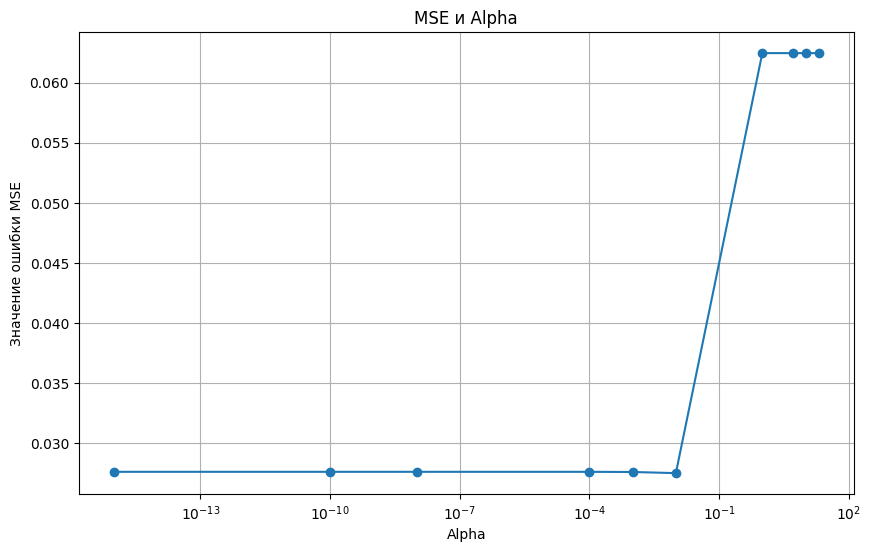

In [316]:
lasso = Lasso(alpha=1e-2)
lasso.fit(X_train, y_train)

y_pred_l = lasso.predict(X_test)
mse_l = mean_squared_error(y_test, y_pred_l)
print(f'MSE: {mean_squared_error(y_test, y_pred_l)}')
print(f'r2: {r2_score(y_test, y_pred_l)}')

alphas = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]
mse_list = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)


plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_list, marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Значение ошибки MSE')
plt.title('MSE и Alpha')
plt.grid(True)
plt.show()

In [319]:
tree_model = DecisionTreeRegressor(max_depth=5)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
print(f"Decision Tree Regressor MSE: {mse_tree}")
print(f'DTR r2: {r2_score(y_test, y_pred_tree)}')

forest_model = RandomForestRegressor(max_depth=5, n_estimators=200)
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)
mse_forest = mean_squared_error(y_test, y_pred_forest)
print(f"Random Forest Regressor MSE: {mse_forest}")
print(f'RFR r2: {r2_score(y_test, y_pred_forest)}')

Decision Tree Regressor MSE: 0.03011968212441435
DTR r2: 0.5136293077220035
Random Forest Regressor MSE: 0.02803115954534704
RFR r2: 0.5473546361774395


In [318]:
parameters_tree = {'max_depth': [None, 5, 10, 15, 20]}
parameters_forest = {'n_estimators': [10, 50, 100, 200], 'max_depth': [None, 5, 10, 15, 20]}

tree_regressor = GridSearchCV(DecisionTreeRegressor(random_state=0), parameters_tree, scoring='neg_mean_squared_error', cv=5)
forest_regressor = GridSearchCV(RandomForestRegressor(random_state=0), parameters_forest, scoring='neg_mean_squared_error', cv=5)

tree_regressor.fit(X_train, y_train)
forest_regressor.fit(X_train, y_train)

print(f"Decision Tree Regressor Best parameters: {tree_regressor.best_params_}")
print(f"Decision Tree Regressor Best score: {tree_regressor.best_score_}")
print(f"Random Forest Regressor Best parameters: {forest_regressor.best_params_}")
print(f"Random Forest Regressor Best score: {forest_regressor.best_score_}")

Decision Tree Regressor Best parameters: {'max_depth': 5}
Decision Tree Regressor Best score: -0.026460395188151825
Random Forest Regressor Best parameters: {'max_depth': 5, 'n_estimators': 200}
Random Forest Regressor Best score: -0.019552131882768123


In [320]:
reg1 = GradientBoostingRegressor(random_state=10)
reg1.fit(X_train, y_train)

y_pred_gbr = reg1.predict(X_test)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
print(f"GradientBoostingRegressor MSE: {mse_gbr}")
print('R2 score: {:.2f}'.format(r2_score(y_test, y_pred_gbr)))

GradientBoostingRegressor MSE: 0.02934742480240272
R2 score: 0.53


In [321]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Ridge','Lasso', 'Decision Tree', 'Random Forest',
             'Gradient Boosting'],
    'MSE' : [mse_lr, mse_r, mse_l, mse_tree, mse_forest, mse_gbr]
})


models.sort_values(by = 'MSE', ascending = True)

Model       MSE
1              Ridge  0.027471
2              Lasso  0.027497
0  Linear Regression  0.027606
4      Random Forest  0.028031
5  Gradient Boosting  0.029347
3      Decision Tree  0.030120

## Значение ошибки получилось меньше, чем при PCA :(

# Кластеризация

In [381]:
cluster_data = data.drop('class', axis=1)

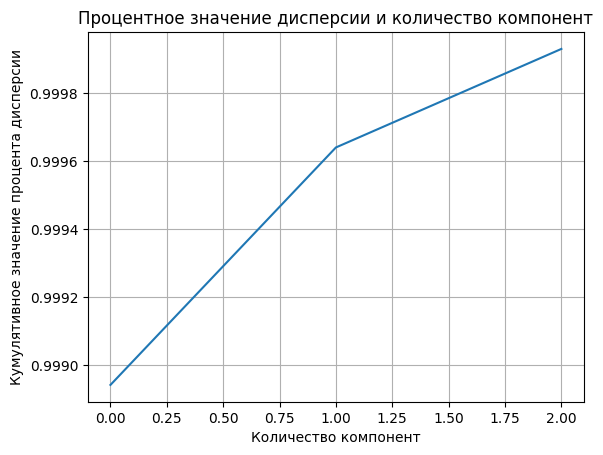

In [382]:
data_pca = pca.fit(cluster_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Количество компонент')
plt.ylabel('Кумулятивное значение процента дисперсии')
plt.title('Процентное значение дисперсии и количество компонент')
plt.grid(True)
plt.show()

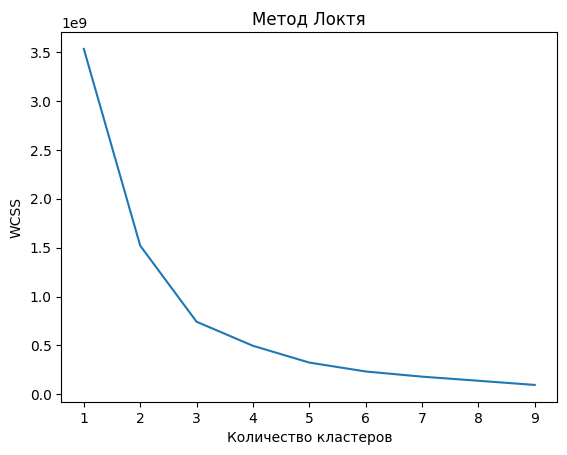

In [383]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


pca = PCA(n_components=2)
data_PCA = pca.fit_transform(cluster_data)

inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42).fit(data_PCA)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia)
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.title('Метод Локтя')
plt.show()

Silhouette Score for 2-clusters: 0.5705857377789739
Silhouette Score for 3-clusters: 0.5961071142622507
Silhouette Score for 4-clusters: 0.5492223436166128
Silhouette Score for 5-clusters: 0.5601068304920229


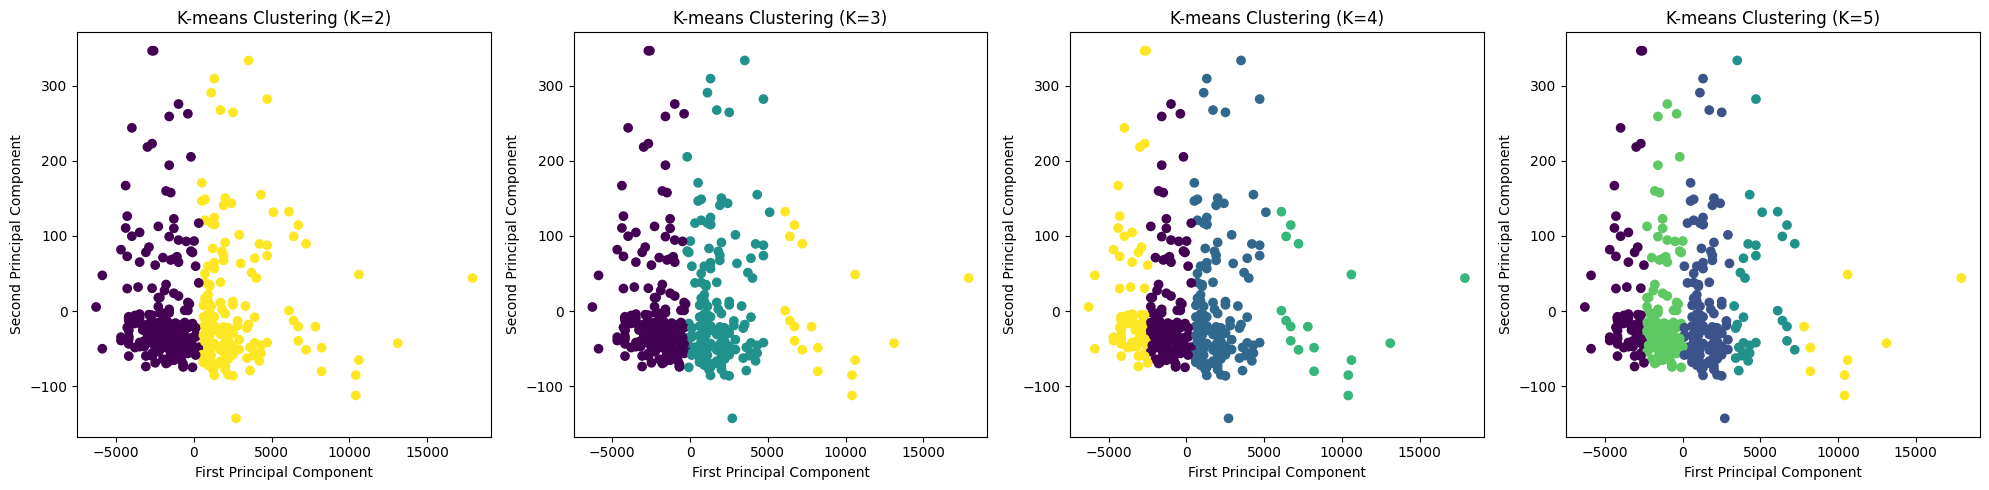

In [392]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

for i, n_clusters in enumerate(range(2, 6)):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42).fit(data_PCA)
    axs[i].scatter(data_PCA[:, 0], data_PCA[:, 1], c=kmeans.labels_, cmap="viridis")
    axs[i].set_xlabel("First Principal Component")
    axs[i].set_ylabel("Second Principal Component")
    axs[i].set_title(f"K-means Clustering (K={n_clusters})")
    silhouette_kmeans = silhouette_score(data_PCA, kmeans.labels_)
    print(f"Silhouette Score for {n_clusters}-clusters:", silhouette_kmeans)

plt.tight_layout()
plt.show()

In [394]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42).fit(data_PCA)

data['cluster'] = kmeans.labels_
cluster_means = data.groupby('cluster')['haemoglobin'].mean()
print(cluster_means)

cluster
0    12.724272
1    12.492614
2    10.744444
Name: haemoglobin, dtype: float64


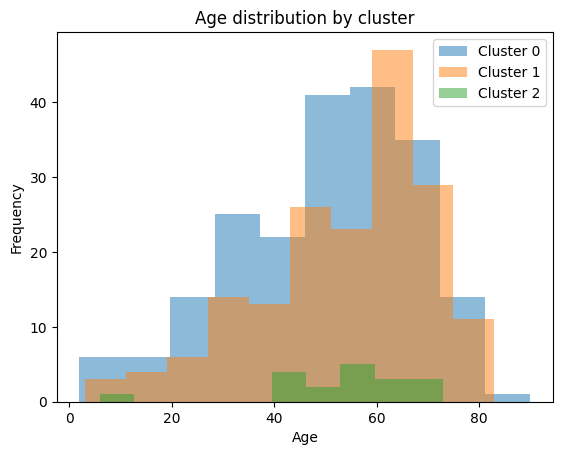

In [396]:
for i in range(n_clusters):
    plt.hist(data[data['cluster'] == i]['age'], alpha=0.5, label=f'Cluster {i}')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age distribution by cluster')
plt.legend()
plt.show()

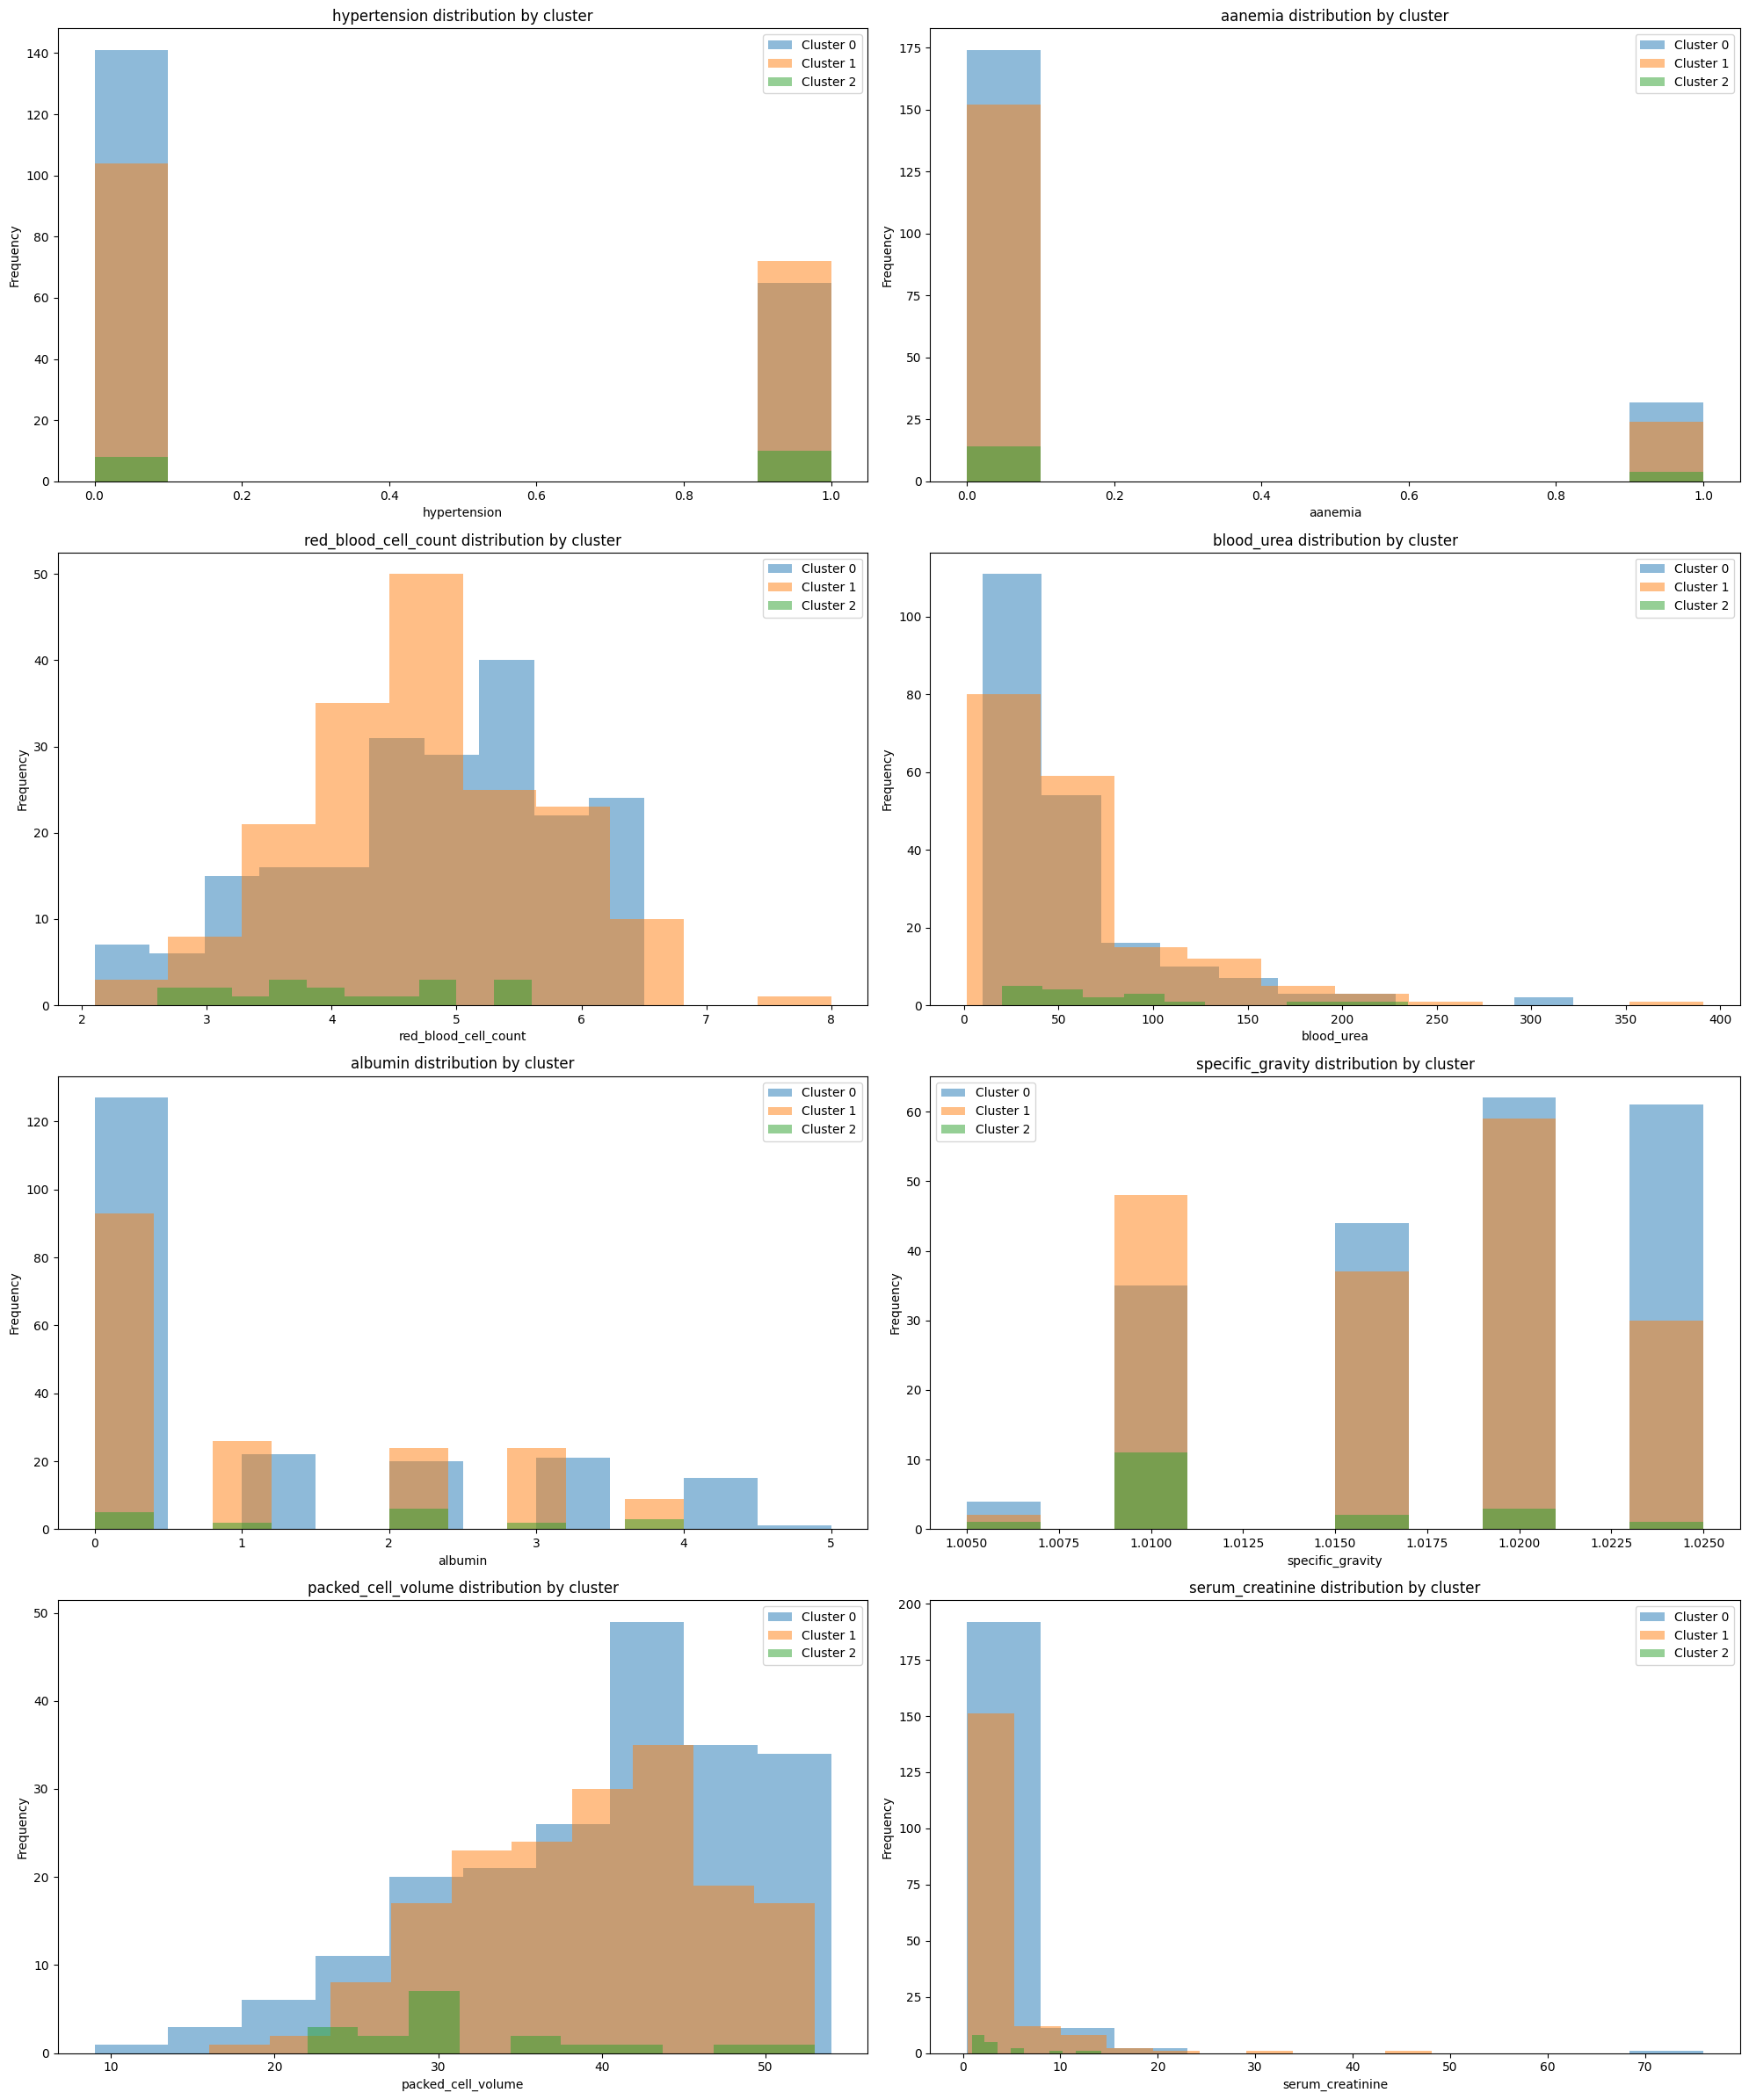

In [403]:
features = ['hypertension','aanemia','red_blood_cell_count','blood_urea','albumin','specific_gravity','packed_cell_volume', 'serum_creatinine']

n_rows = int(len(features) / 2)
n_cols = 2 if len(features) > 1 else 1

fig, axs = plt.subplots(n_rows, n_cols, figsize=(10*n_cols, 6*n_rows))

for i, feature in enumerate(features):
    row = i // n_cols
    col = i % n_cols
    for j in range(n_clusters):
        axs[row, col].hist(data[data['cluster'] == j][feature], alpha=0.5, label=f'Cluster {j}')
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title(f'{feature} distribution by cluster')
    axs[row, col].legend()

plt.tight_layout()
plt.show()

# LDA Clustering

In [409]:
y = data['class']
lda = LDA(n_components=1)
X_lda = lda.fit_transform(cluster_data, y)

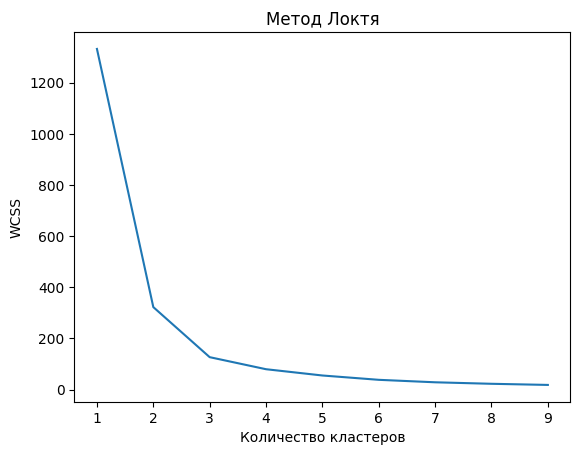

In [410]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42).fit(X_lda)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia)
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.title('Метод Локтя')
plt.show()

In [414]:


for i, n_clusters in enumerate(range(2, 5)):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42).fit(X_lda)
    silhouette_kmeans = silhouette_score(X_lda, kmeans.labels_)
    print(f"Silhouette Score for {n_clusters}-clusters:", silhouette_kmeans)


Silhouette Score for 2-clusters: 0.6464395439395603
Silhouette Score for 3-clusters: 0.6511375696876097
Silhouette Score for 4-clusters: 0.6304510424853698


In [416]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42).fit(X_lda)

data['cluster'] = kmeans.labels_
cluster_means = data.groupby('cluster')['haemoglobin'].mean()
print(cluster_means)

cluster
0    12.033846
1     9.778333
2    15.170000
Name: haemoglobin, dtype: float64


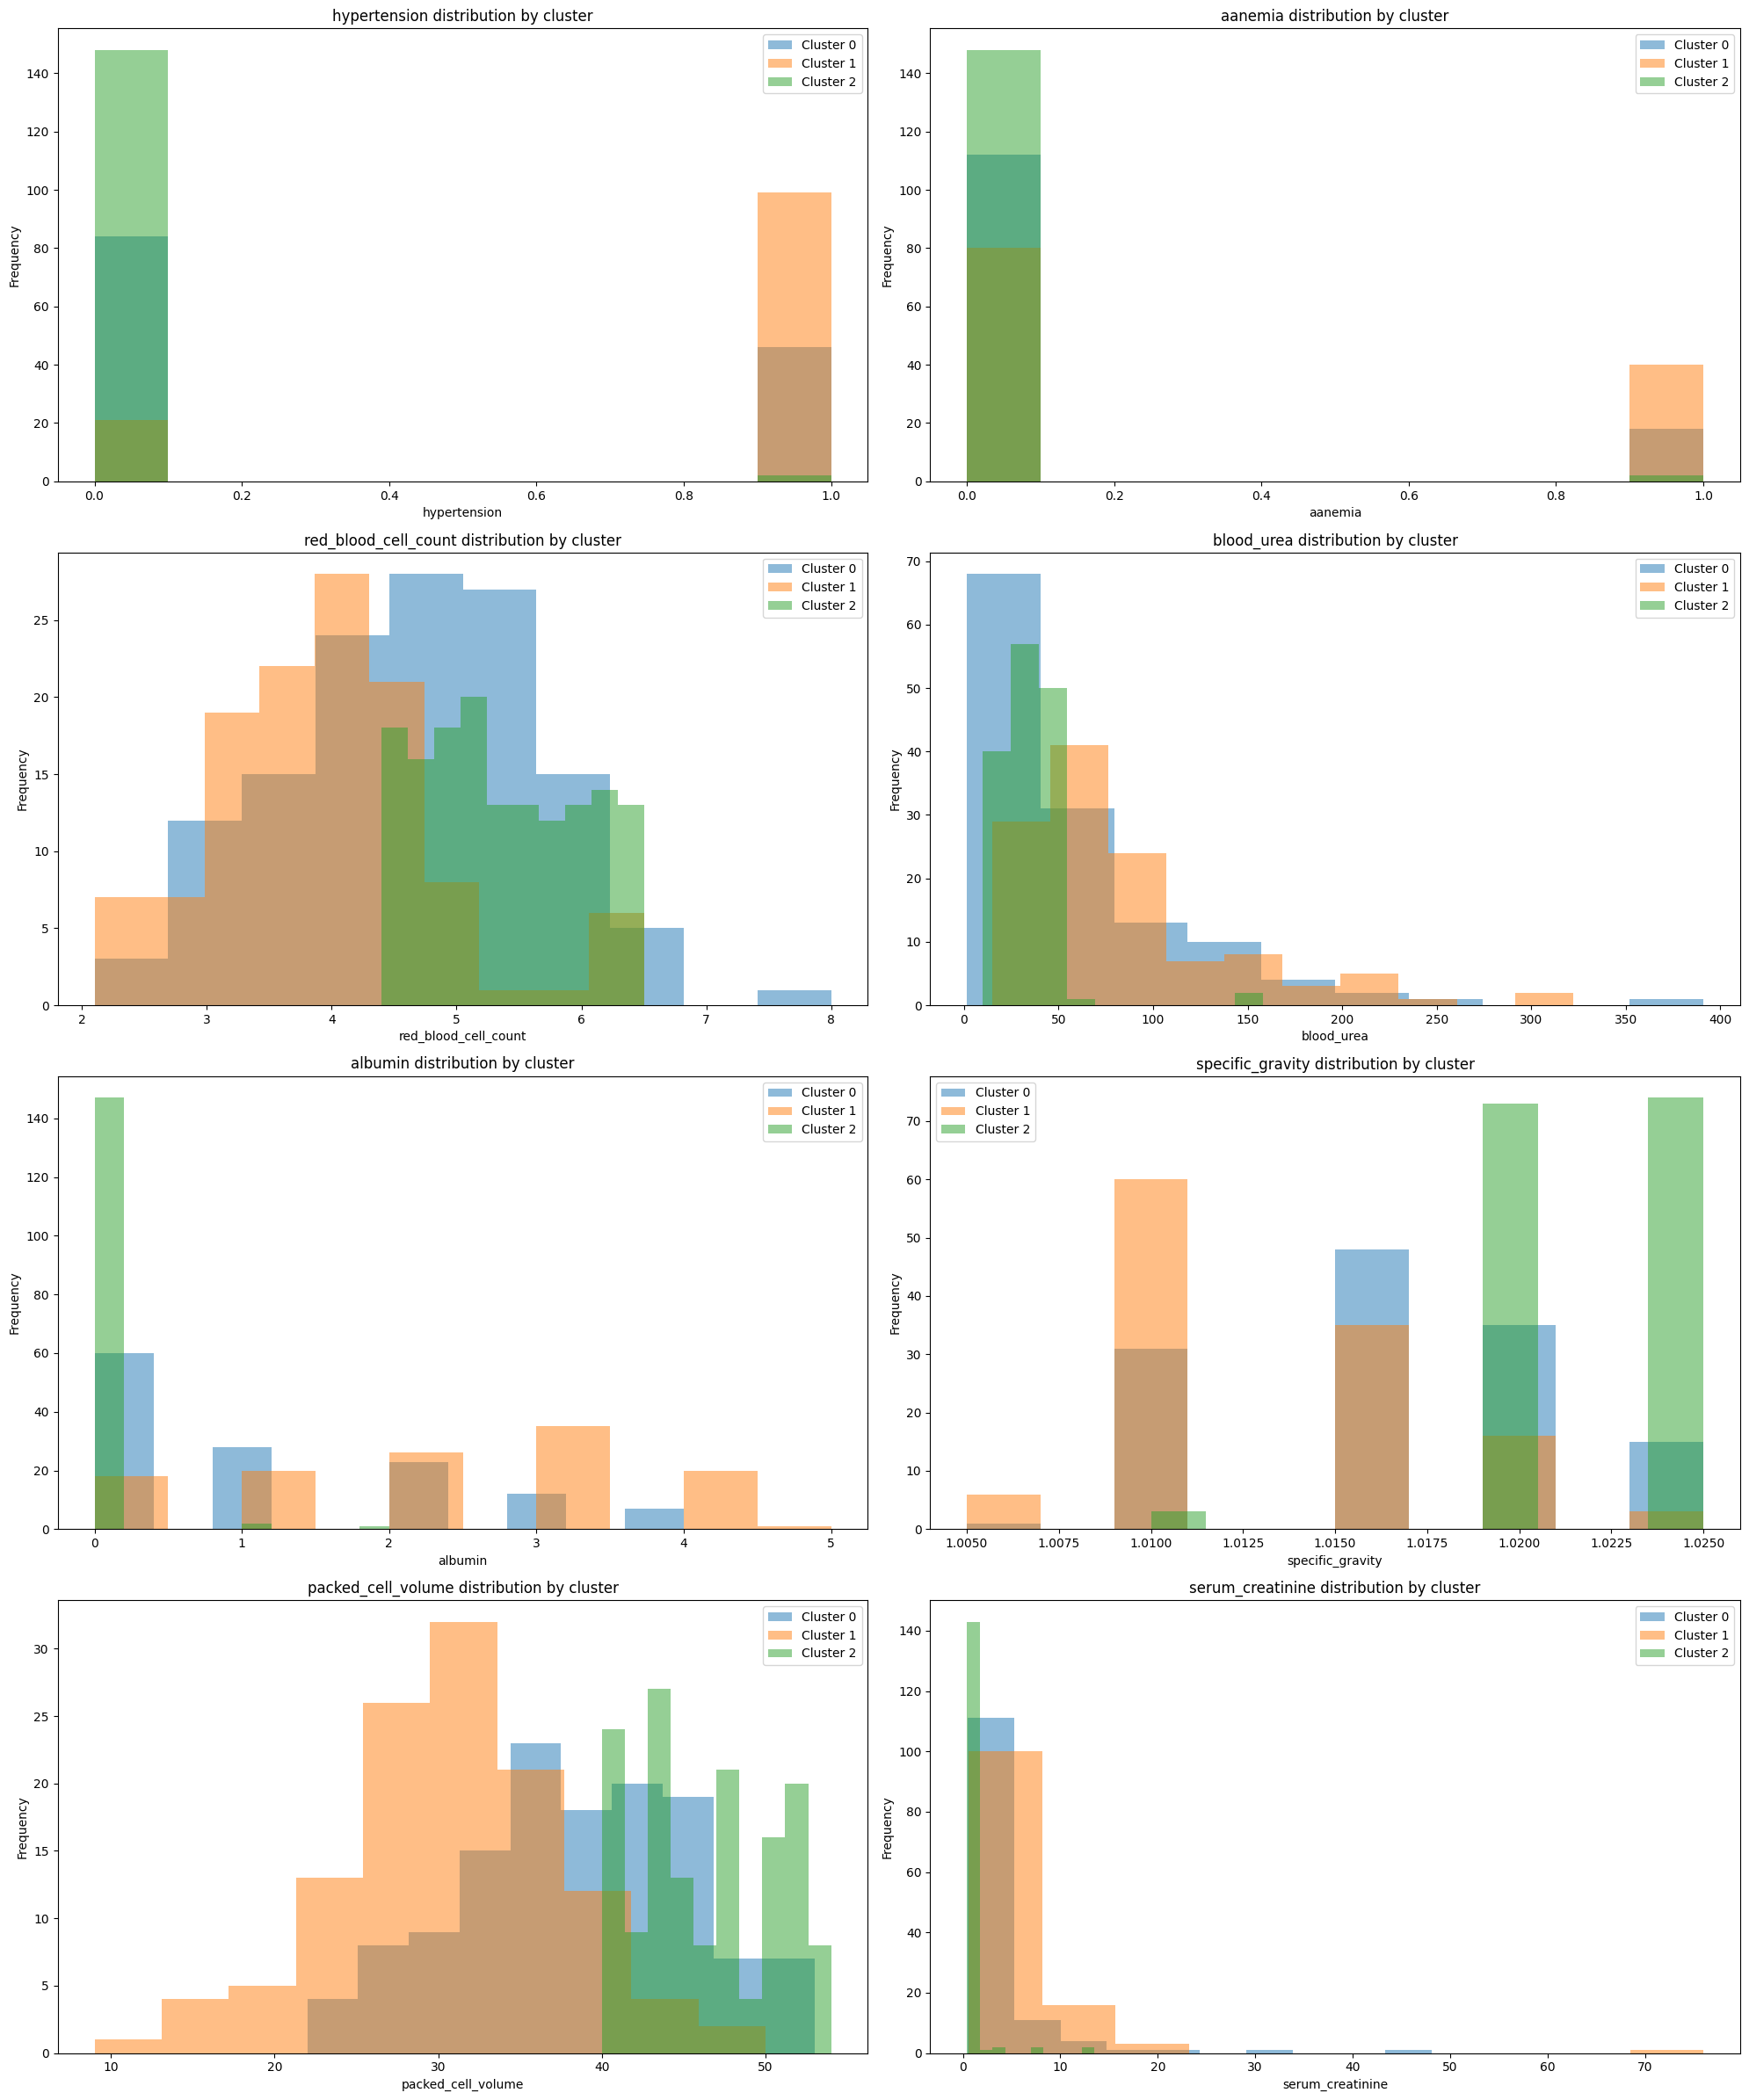

In [417]:
features = ['hypertension','aanemia','red_blood_cell_count','blood_urea','albumin','specific_gravity','packed_cell_volume', 'serum_creatinine']

n_rows = int(len(features) / 2)
n_cols = 2 if len(features) > 1 else 1

fig, axs = plt.subplots(n_rows, n_cols, figsize=(10*n_cols, 6*n_rows))

for i, feature in enumerate(features):
    row = i // n_cols
    col = i % n_cols
    for j in range(n_clusters):
        axs[row, col].hist(data[data['cluster'] == j][feature], alpha=0.5, label=f'Cluster {j}')
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title(f'{feature} distribution by cluster')
    axs[row, col].legend()

plt.tight_layout()
plt.show()

# Второй кластер явно выделяется среди всех остальных кластеров.

# T-SNE clustering

C:\Users\Ксения\AppData\Local\Temp\ipykernel_8324\195142782.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data_tsne[:, 0], data_tsne[:, 1], cmap='Blues')


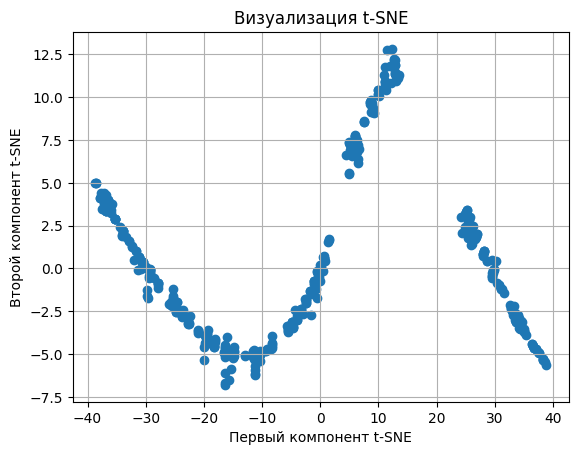

In [419]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(cluster_data)

plt.scatter(data_tsne[:, 0], data_tsne[:, 1])
plt.xlabel('Первый компонент t-SNE')
plt.ylabel('Второй компонент t-SNE')
plt.title('Визуализация t-SNE')
plt.grid(True)
plt.show()

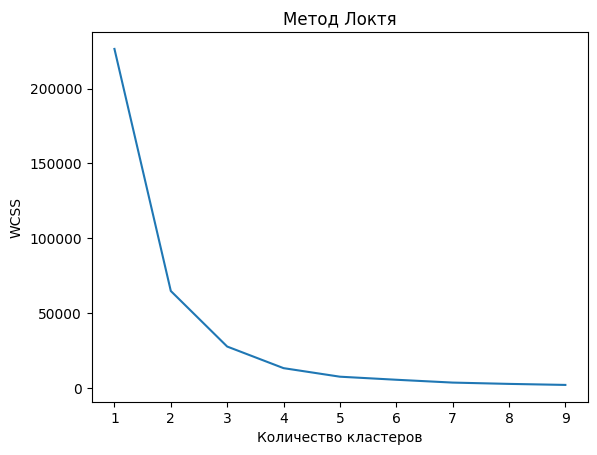

In [420]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42).fit(data_tsne)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia)
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.title('Метод Локтя')
plt.show()

Silhouette Score for 2-clusters: 0.60652983
Silhouette Score for 3-clusters: 0.62574285
Silhouette Score for 4-clusters: 0.6364555
Silhouette Score for 5-clusters: 0.65315866


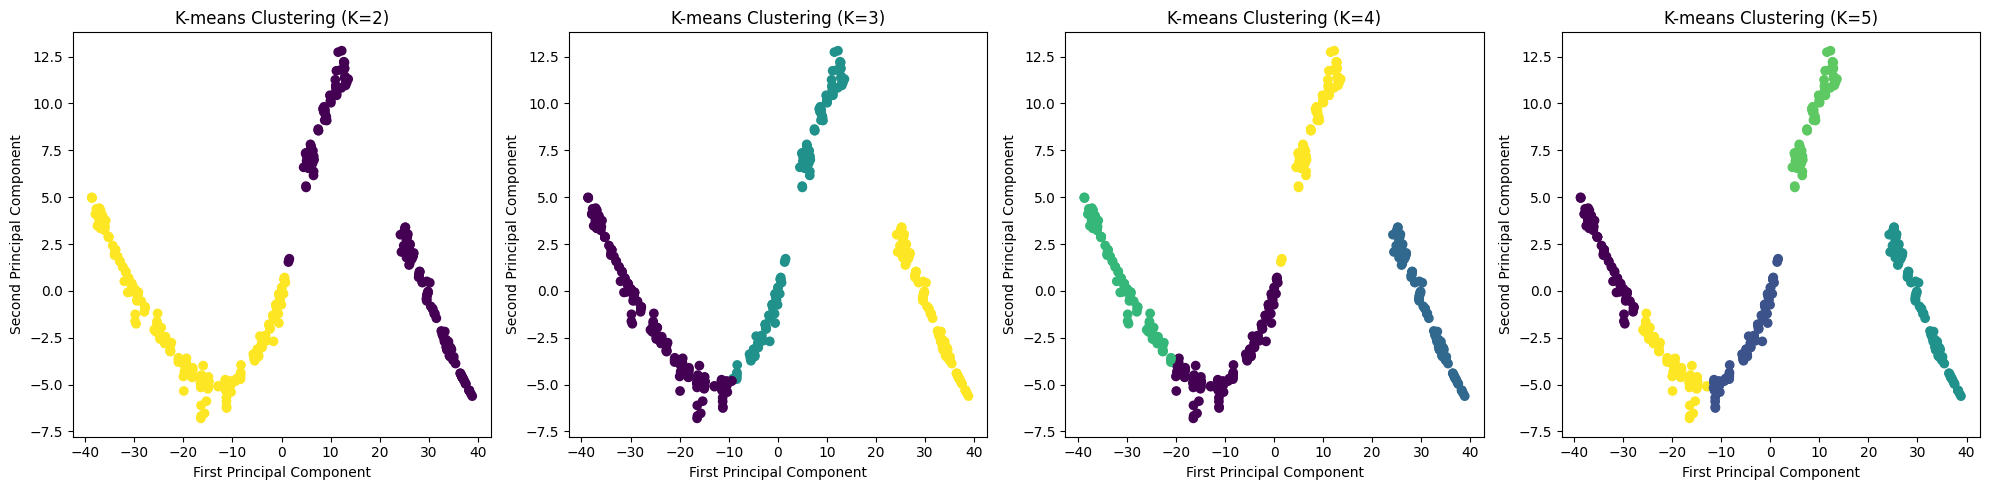

In [421]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

for i, n_clusters in enumerate(range(2, 6)):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42).fit(data_tsne)
    axs[i].scatter(data_tsne[:, 0], data_tsne[:, 1], c=kmeans.labels_, cmap="viridis")
    axs[i].set_xlabel("First Principal Component")
    axs[i].set_ylabel("Second Principal Component")
    axs[i].set_title(f"K-means Clustering (K={n_clusters})")
    silhouette_kmeans = silhouette_score(data_tsne, kmeans.labels_)
    print(f"Silhouette Score for {n_clusters}-clusters:", silhouette_kmeans)

plt.tight_layout()
plt.show()

# DBSCAN с такими кластерами не справится

In [422]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42).fit(data_tsne)

data['cluster'] = kmeans.labels_
cluster_means = data.groupby('cluster')['haemoglobin'].mean()
print(cluster_means)

cluster
0    12.360274
1    13.043902
2    11.812371
3    12.669863
4    12.942667
Name: haemoglobin, dtype: float64


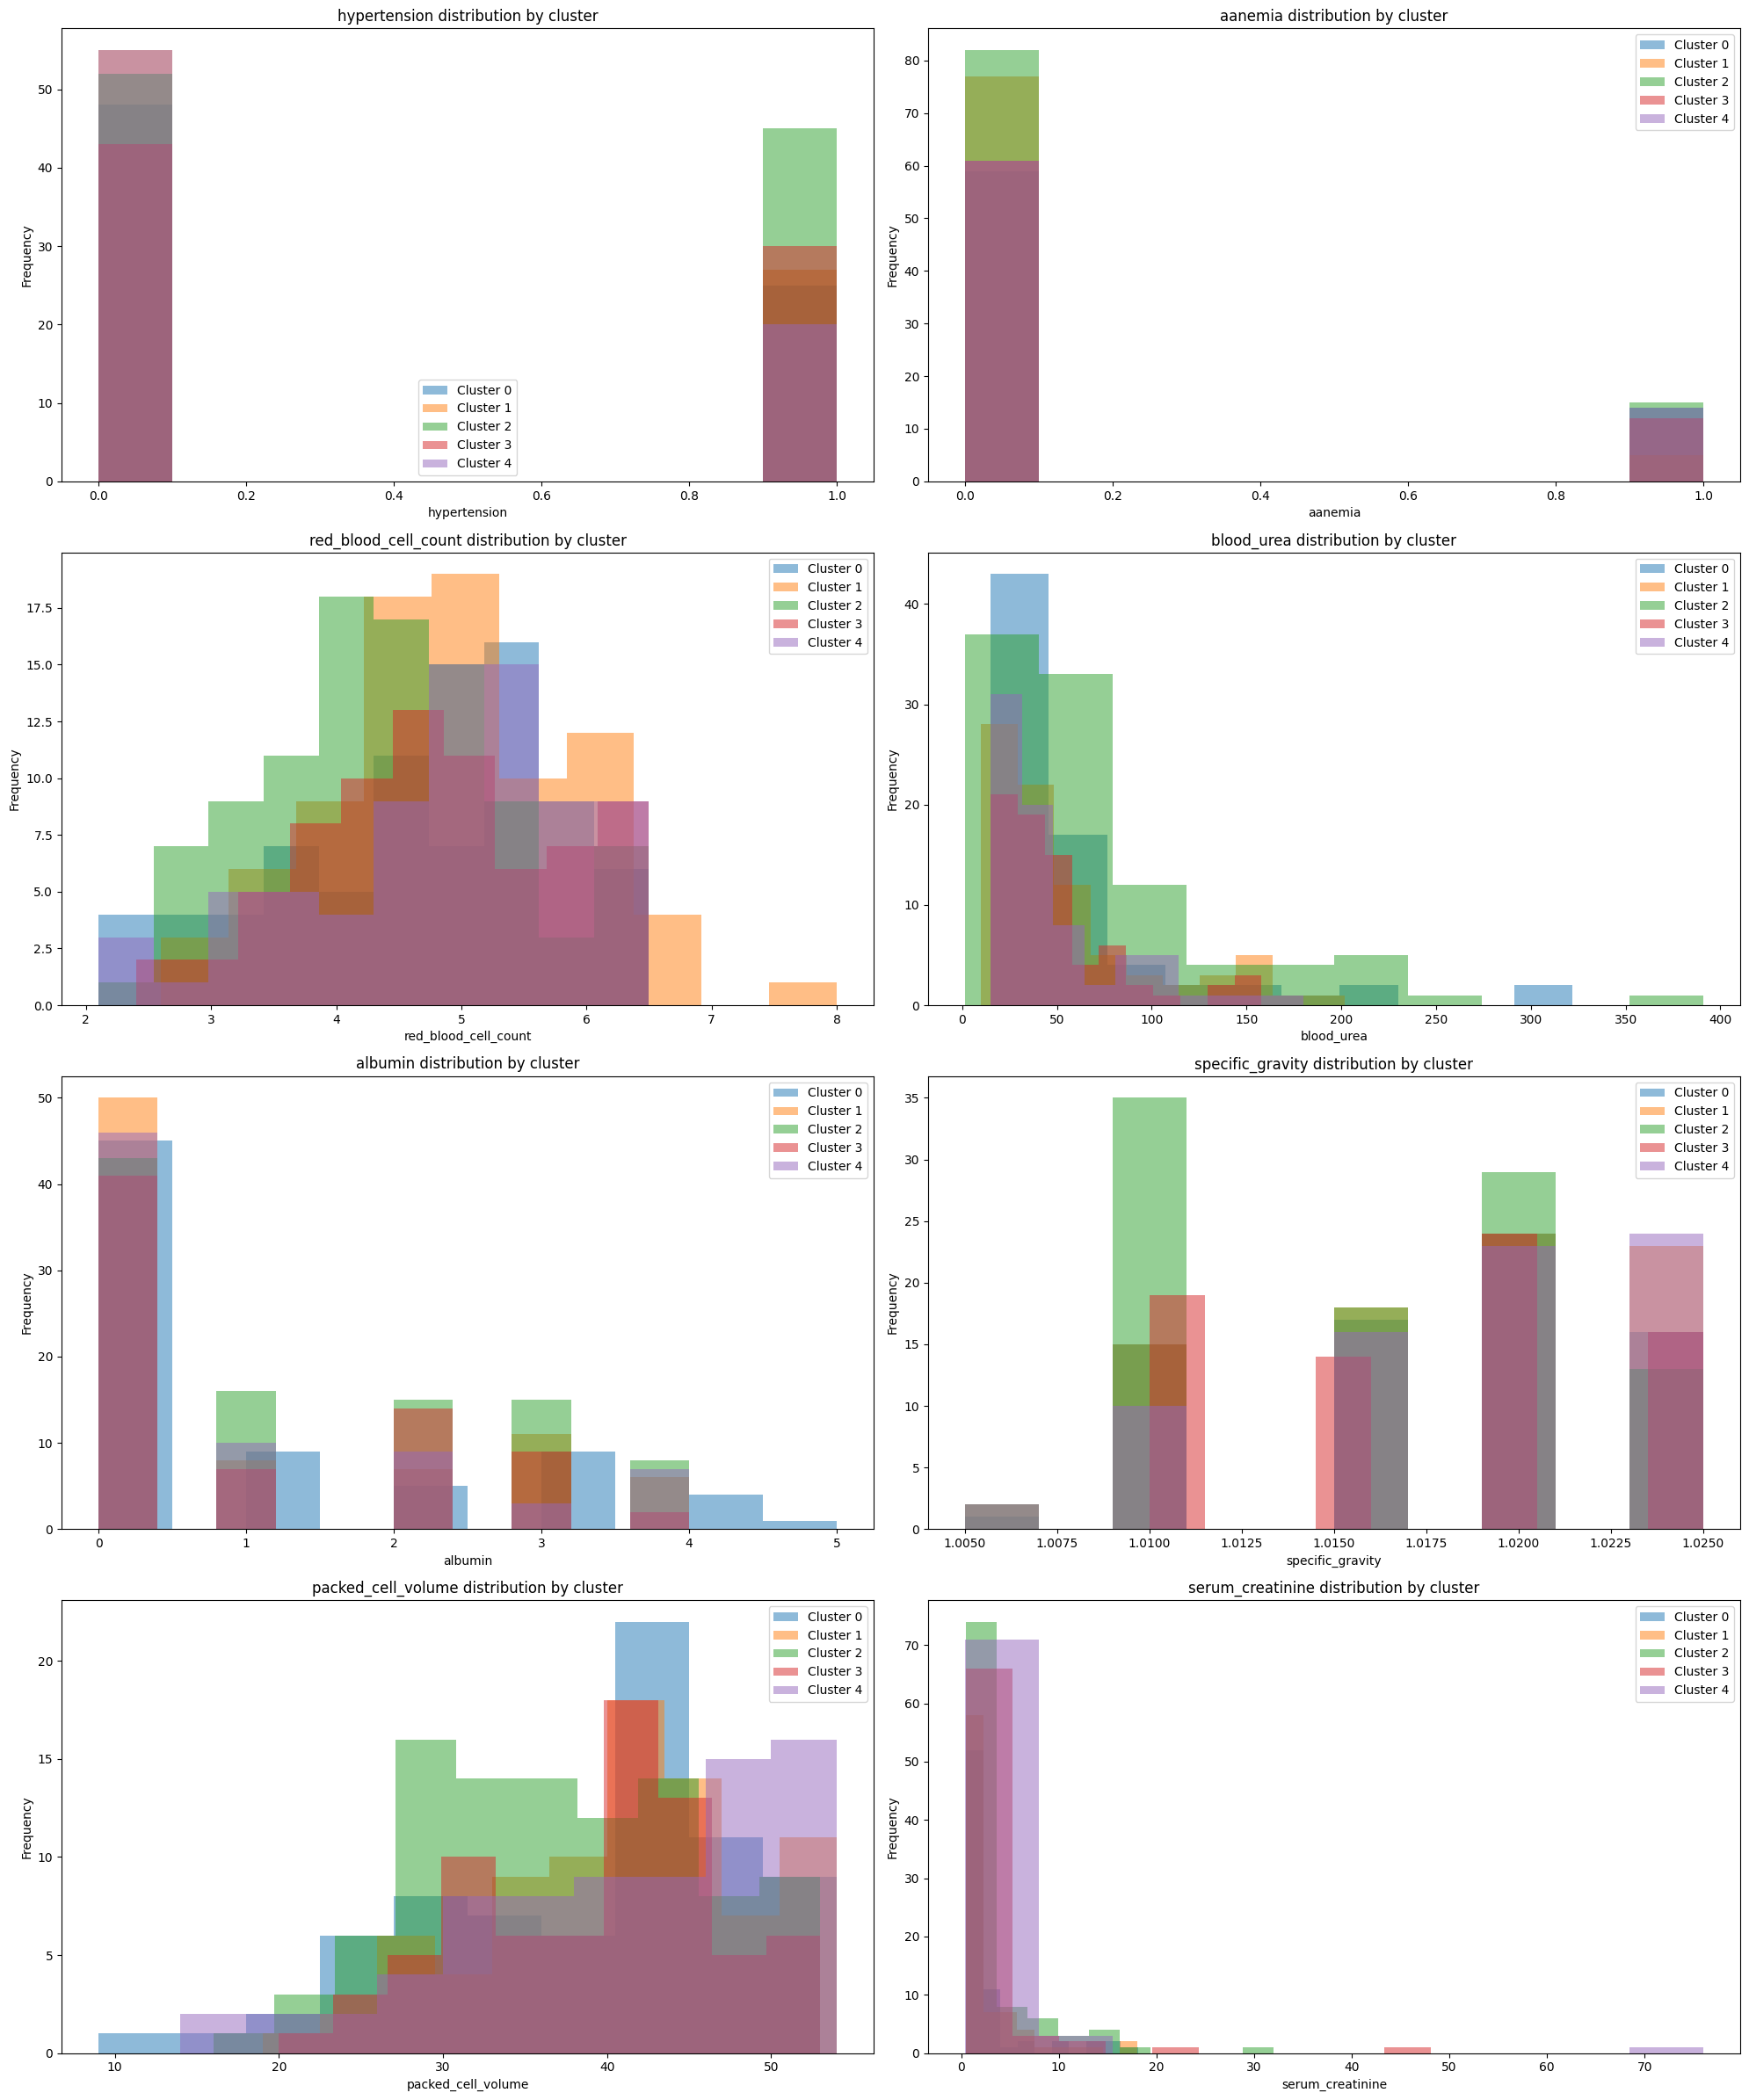

In [423]:
features = ['hypertension','aanemia','red_blood_cell_count','blood_urea','albumin','specific_gravity','packed_cell_volume', 'serum_creatinine']

n_rows = int(len(features) / 2)
n_cols = 2 if len(features) > 1 else 1

fig, axs = plt.subplots(n_rows, n_cols, figsize=(10*n_cols, 6*n_rows))

for i, feature in enumerate(features):
    row = i // n_cols
    col = i % n_cols
    for j in range(n_clusters):
        axs[row, col].hist(data[data['cluster'] == j][feature], alpha=0.5, label=f'Cluster {j}')
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title(f'{feature} distribution by cluster')
    axs[row, col].legend()

plt.tight_layout()
plt.show()

# Получилась смесь всего, что даже сложно что-то выделить конкретное

## <strong>Кластеризация</strong>
 ### Таким образом, наибольшее значение метрики Силуэтта при методах LDA и T-SNE - 0.65. PCA распределил данные так, что их сложно адекватно разделить на кластеры по крайней мере визуально, t-sne в этом плане построил разделение данных лучше, однако некоторые методы кластеризации не справились бы с таким разделением. Минус lda в данном случае, что это обучение с учителем, он разделяет данные подстраиваясь под traget, поэтому разделить данные получилось только на 1 компоненту, которую даже не получилось визуализировать. 
### <strong>В итоге, можно сделать вывод, что хорошо себя показал T-SNE и PCA.</strong>

## <strong>Регрессия</strong>
 ### В задаче регрессии при понижении размерности с помощью PCA наименьшую ошибку MSE показал метод Ridge (0.029269), а при использовании LDA - так же метод Ridge (0.027471). Проблема в том, что у меня не получилось обучить LDA для регрессии, ибо там требуется условие, что значение не должно быть больше, чем n_classes-1. Поэтому я разделила данные на три категории (большой гемоглобин, маленький, средний). В итоге, задача грубо говоря свелась к задаче классификации, поэтому в данном случае LDA справился лучше.
### <strong>В итоге, оба метода показали себя хорошо, но меньшая ошибка при LDA.</strong>

## <strong>Классификация</strong>
 ### В задаче классификации, как должно и быть, должен справиться лучше всего метод LDA. При LDA максимальное значение точности получилось у метода k ближайших соседей (0.983333), а при PCA - также k ближайших соседей (0.991667). Таким образом, у меня получилось все наоборот. Однако, минимальная точность у тех же методов при LDA оказалась выше (0.975000), чем при PCA (0.958333), это может давать возможность использовать больше методов для обучения и получать большую точность. 
### <strong>Таким образом, LDA служит для классификации, большая общая точность достигается при этом методе. PCA следует использовать для задач регрессии и классификации.</strong>